# Competição Titanic Kaggle

In [15]:
#!pip install kaggle pandas scikit-learn numpy
#!pip install ipykernel
#!pip install kaggle
#!pip install matplotlib
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [2]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api = KaggleApi()
api.authenticate()

In [4]:
api.competition_download_file('titanic','train.csv')

train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
import pandas as pd

df2 = pd.read_csv('train.csv')

df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


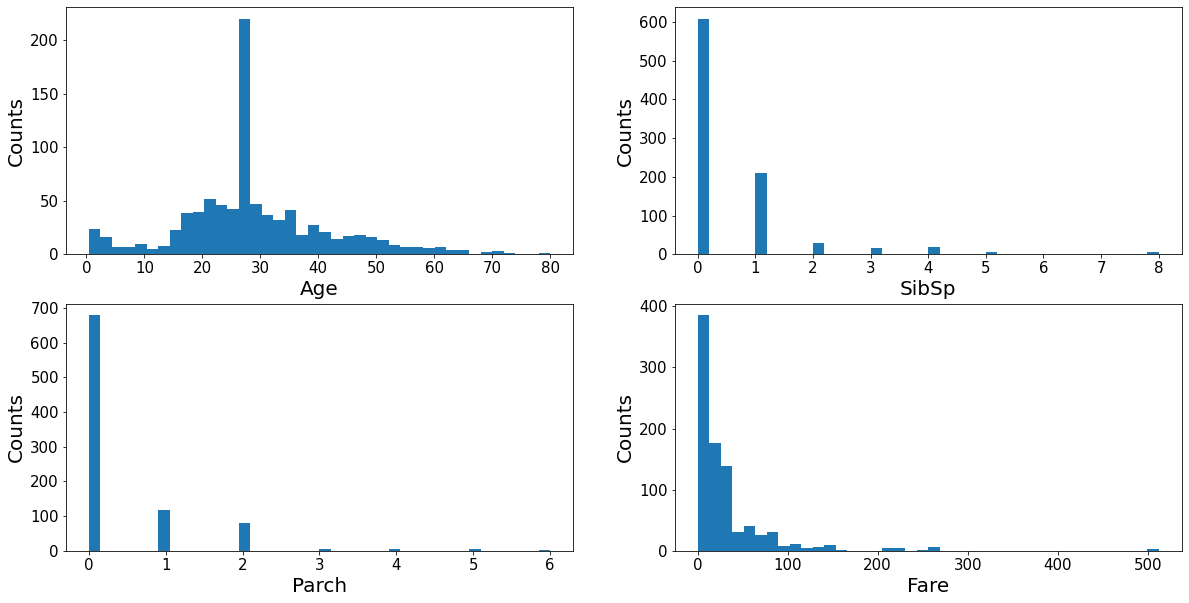

In [8]:
# import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)


In [9]:
import numpy as np

def fill_na_most(data, inplace=True):
    return df.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])


# check the result
df['Embarked'].describe()

def log_transformation(data):
    return data.apply(np.log1p)

df['Fare_log1p'] = log_transformation(df['Fare'])

In [10]:
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = df[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [11]:
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([df[features_model], data_cat_dummies], axis=1)

# check the data
data_model_X.head()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0,0,1,0,1,0,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0
2,26.0,0,0,2.188856,0,0,1,1,0,0,0,1
3,35.0,1,0,3.990834,1,0,0,1,0,0,0,1
4,35.0,0,0,2.202765,0,0,1,0,1,0,0,1


In [12]:
data_model_y = df.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

data_model_y.head()

0    Not_survived
1        Survived
2        Survived
3        Survived
4    Not_survived
Name: Survived, dtype: object

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

print(y_train.value_counts())
print(y_val.value_counts())

Not_survived    373
Survived        250
Name: Survived, dtype: int64
Not_survived    176
Survived         92
Name: Survived, dtype: int64


In [17]:
# import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
# Instantiate the classification model 
clf.fit(X_train,y_train)

y_pred=clf.predict(X_val)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.8283582089552238


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[155,  21],
       [ 25,  67]], dtype=int64)

In [19]:
from pprint import pprint
from sklearn.model_selection import GridSearchCV

print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [50,100,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(param_grid)

{'bootstrap': [True],
 'max_depth': [10, 20, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200]}


In [36]:
rf = RandomForestClassifier()

#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=123, n_jobs = -1)
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)


rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [37]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [38]:
y_pred=rf_grid.predict(X_val)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.8432835820895522


In [42]:
api.competition_download_file('titanic','test.csv')

test = pd.read_csv('test.csv')

test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
from sklearn.ensemble import RandomForestClassifier

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)



In [51]:
test['Fare_log1p'] = log_transformation(test['Fare'])
fill_na_most(test['Embarked'])
test['Age'] = test['Age'].fillna(test['Age'].median())

cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = test[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

num_features = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([test[num_features], data_cat_dummies], axis=1)
data_model_X.head()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,2.178064,0,0,1,0,1,0,1,0
1,47.0,1,0,2.079442,0,0,1,1,0,0,0,1
2,62.0,0,0,2.369075,0,1,0,0,1,0,1,0
3,27.0,0,0,2.268252,0,0,1,0,1,0,0,1
4,22.0,1,1,2.586824,0,0,1,1,0,0,0,1


In [65]:
y_pred = rf_grid.predict(data_model_X)
y_pred

array(['Not_survived', 'Not_survived', 'Not_survived', 'Not_survived',
       'Survived', 'Not_survived', 'Survived', 'Not_survived', 'Survived',
       'Not_survived', 'Not_survived', 'Not_survived', 'Survived',
       'Not_survived', 'Survived', 'Survived', 'Not_survived', 'Survived',
       'Not_survived', 'Survived', 'Not_survived', 'Not_survived',
       'Survived', 'Not_survived', 'Survived', 'Not_survived', 'Survived',
       'Not_survived', 'Survived', 'Not_survived', 'Not_survived',
       'Not_survived', 'Not_survived', 'Not_survived', 'Survived',
       'Survived', 'Not_survived', 'Not_survived', 'Not_survived',
       'Survived', 'Not_survived', 'Survived', 'Not_survived', 'Survived',
       'Survived', 'Not_survived', 'Not_survived', 'Not_survived',
       'Survived', 'Survived', 'Survived', 'Not_survived', 'Survived',
       'Survived', 'Not_survived', 'Not_survived', 'Not_survived',
       'Not_survived', 'Not_survived', 'Survived', 'Not_survived',
       'Not_survived',

In [73]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log1p
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2.178064
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.079442
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2.369075
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2.268252
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.586824
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,2.202765
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,4.699571
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2.110213
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,2.202765


In [72]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})

output.replace({'Survived': {'Not_survived': 0, 'Survived': 1}},inplace=True)

output.head()
output.to_csv('submission.csv', index=False)